# Python Script  for Keyword Research

***
#### Google is the king of search engines, making it the ultimate source of data for a whole host of use cases.

#### If you work as a marketer or an analyst specifically with search engine optimization (SEO), I bet you already use Google autocomplete for keyword research.

#### A user performing a search will generally see 3 - 10 suggestions, that best matches the entered term, and a click on any keyword from the list leads to the search results page.

#### Finding keywords with autocomplete may work fine but it is a mundane and time-consuming process if you copy keywords manually from Google suggestions.

*** 

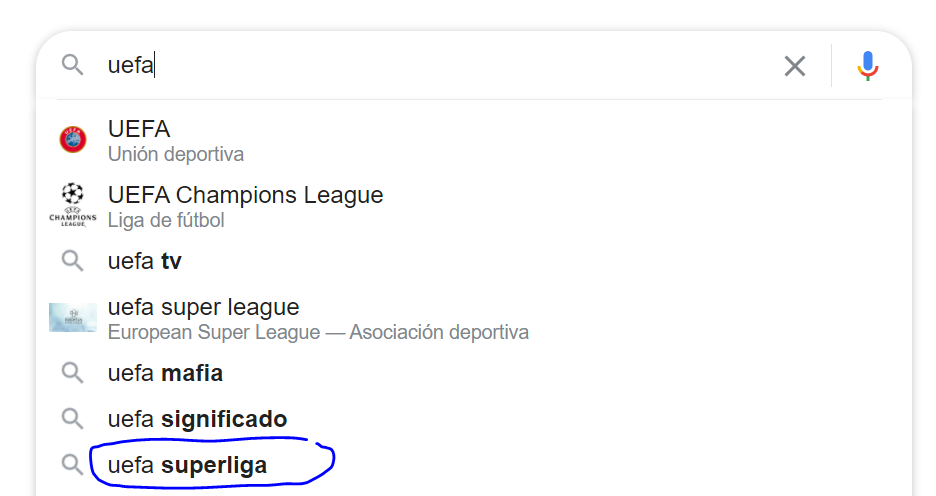

***
**Perform this process on scale for multiple seed keywords with this simple Python code.**
***

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import urllib
import requests
from bs4 import BeautifulSoup

***
**Put your seed keywords into seed.csv**
***

In [2]:
seed = pd.read_csv("seed.csv", header=None)
display(seed.head(20))
keywords = seed.iloc[:,0].str.lower().tolist()

,0
0,reviews
1,tours
2,travel
3,adventures
4,packages
5,vacations
6,tour companies
7,river
8,trips
9,tours reviews


***
**To build a URL to query Google, you need to know the URL parameters for the data you need.**
<br>
**Search keyword parameter is denoted as q - http://www.google.com/search?q=tshirt**
<br>
**Language parameter is denoted as hl -  http://www.google.com/search?q=tshirt&hl=en**
<br>
**Country parameter is denoted as countryXX - http://www.google.com/search?q=tshirt&hl=en&cr=countryUS**
***

In [3]:
#parameters
language = "es"
country = 'ES'
suggestions = []

In [4]:
for kw in keywords:
  r = requests.get('http://suggestqueries.google.com/complete/search?output=toolbar&q={}&hl={}&cr=country{}'.format(kw,language,country))
  soup = BeautifulSoup(r.content, 'html.parser')
  sugg = [sugg['data'] for sugg in soup.find_all('suggestion')]
  suggestions.extend(sugg)

In [5]:
keywords.extend(suggestions)

***
**Look at results in output.csv**
***

In [6]:
pd.DataFrame(keywords).to_csv('output.csv',index=False,header=False)

***
#### There are some caveats, if you perform too many requests over a short period, Google will throw captchas at you. Google does not want people to programmatically pull its autocomplete keyword suggestions. You will need to use a proxy if you want to scrape at massive scale. If you don’t, you could get flagged and get your IP-banned.
***